In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Conjoint Analysis

/content/drive/MyDrive/Conjoint Analysis


In [3]:
# Install library
!pip install squarify

In [4]:
#import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import squarify

In [5]:


# Load the data
df = pd.read_csv('netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


### Data processing

In [6]:
# Isloate X and Y
y = df.selected
X = df.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


In [7]:
# Create dummy variables
x_dummy = pd.get_dummies(X , columns = X.columns)
x_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


### Regression model

In [8]:
model = sm.GLM(y,
               x_dummy,
               family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Mon, 06 Jan 2025   Deviance:                       3896.6
Time:                        09:11:45   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7036      0.090     -7.813      0.000      -0.880      -0.527
NumberAccounts_2                -0.0720      0.089     -0.812      0.417      -0.246       0.102
NumberAccounts_3                -0.0220      0.088     -0.250      0.802      -0.194       0.150
NumberAccounts_4                 0.1252      0.083      1.500      0.134      -0.038       0.289
NumberAccounts_5                 0.1316      0.085      1.557      0.120      -0.034       0.297
NumberAccounts_6                 0.4956      0.082      6.042      0.000       0.335       0.656
price_8                          0.2964      0.085      3.491      0.000       0.130       0.463
price_10                         0.2202      0.087      2.529      0.011       0.050       0.391
price_12                         0.2014      0.082      2.449      0.014       0.040       0.363
price_15                         0.0197      0.084      0.235      0.815      -0.145       0.185
price_18                        -0.1026      0.087     -1.178      0.239      -0.273       0.068
price_20                        -0.6803      0.091     -7.515      0.000      -0.858      -0.503
ExtraContent_Disney              0.2274      0.087      2.608      0.009       0.057       0.398
ExtraContent_HBO                 0.2266      0.085      2.670      0.008       0.060       0.393
ExtraContent_Marvel              0.1451      0.084      1.728      0.084      -0.020       0.310
ExtraContent_Prime originals     0.1268      0.086      1.472      0.141      -0.042       0.296
ExtraContent_Soccer             -0.2046      0.085     -2.408      0.016      -0.371      -0.038
ExtraContent_less content       -0.5665      0.088     -6.408      0.000      -0.740      -0.393
ads_none                         0.2075      0.055      3.747      0.000       0.099       0.316
ads_one_per_day                  0.1088      0.056      1.933      0.053      -0.002       0.219
ads_one_per_show                -0.3615      0.057     -6.328      0.000      -0.473      -0.250
================================================================================================
"""

### Conjoint Analysis

In [9]:
# Create Df with results
df_result = pd.DataFrame({'param_name': model.params.index, 'partworth': model.params.values, 'pval': model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.703558,5.575754e-15
NumberAccounts_2,NumberAccounts_2,-0.071964,4.170435e-01
NumberAccounts_3,NumberAccounts_3,-0.021969,8.022231e-01
NumberAccounts_4,NumberAccounts_4,0.125168,1.336233e-01
NumberAccounts_5,NumberAccounts_5,0.131611,1.195067e-01
NumberAccounts_6,NumberAccounts_6,0.495567,1.520723e-09
price_8,price_8,0.296450,4.816741e-04
price_10,price_10,0.220234,1.144243e-02
price_12,price_12,0.201383,1.433707e-02
price_15,price_15,0.019742,8.145491e-01


In [10]:
# Identifying the statiscally significant variables
df_result['is_significant'] = (df_result['pval'] < 0.05)
df_result['color'] = ['blue' if x else 'red' for x in df_result['is_significant']]
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.703558,5.575754e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.071964,4.170435e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.021969,8.022231e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125168,1.336233e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131611,1.195067e-01,False,red


In [11]:
# Sort the values
df_result = df_result.sort_values( by = 'partworth', ascending = True)
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.703558,5.575754e-15,True,blue
price_20,price_20,-0.680346,5.692228e-14,True,blue
ExtraContent_less content,ExtraContent_less content,-0.566463,1.474268e-10,True,blue
ads_one_per_show,ads_one_per_show,-0.361489,2.483809e-10,True,blue
ExtraContent_Soccer,ExtraContent_Soccer,-0.204649,1.604691e-02,True,blue


<function matplotlib.pyplot.show(close=None, block=None)>

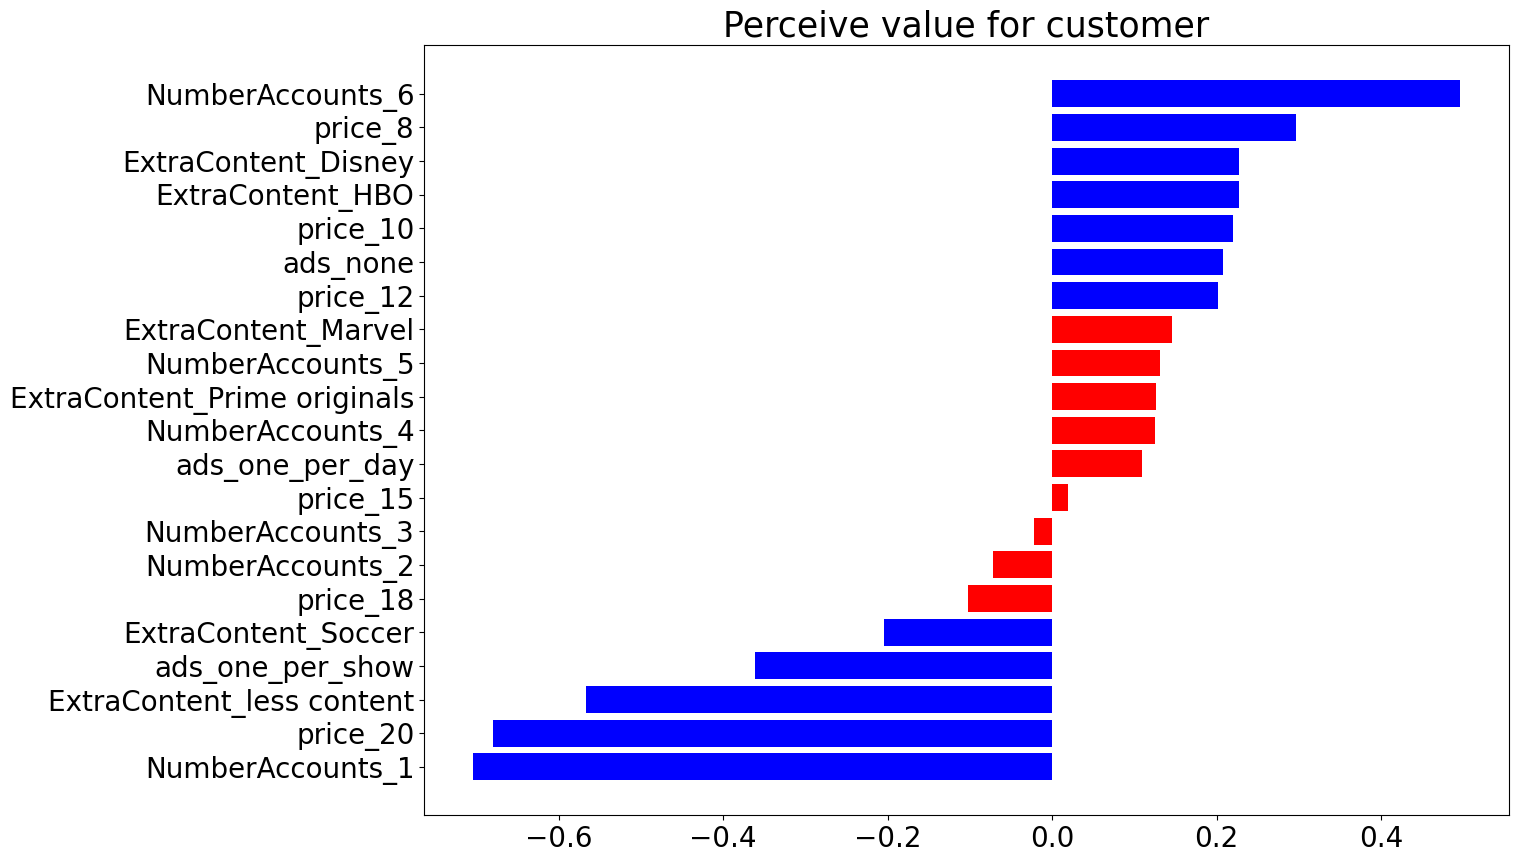

In [12]:
# Plot the partworth
f, ax = plt.subplots(figsize = (14,10))
values = df_result.partworth
xbar = np.arange(len(values))
plt.title('Perceive value for customer', fontsize = 25)
# Bar plot
plt.barh(xbar,values, color = df_result['color'])


# customize ticks
plt.yticks(xbar, labels = df_result['param_name'] , fontsize = 20)
plt.xticks(fontsize = 20)
plt.show

### Specfic Group of features

In [13]:
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.703558,5.575754e-15,True,blue
price_20,price_20,-0.680346,5.692228e-14,True,blue
ExtraContent_less content,ExtraContent_less content,-0.566463,1.474268e-10,True,blue
ads_one_per_show,ads_one_per_show,-0.361489,2.483809e-10,True,blue
ExtraContent_Soccer,ExtraContent_Soccer,-0.204649,1.604691e-02,True,blue


In [14]:
# Isolate the feature group
feature = "price"
attribute = []
coefficents = []
for i in range(len(df_result)):
  if df_result.iloc[i,0].find(feature) == 0:
    attribute.append(df_result.iloc[i,0])
    coefficents.append(df_result.iloc[i,1])

<function matplotlib.pyplot.show(close=None, block=None)>

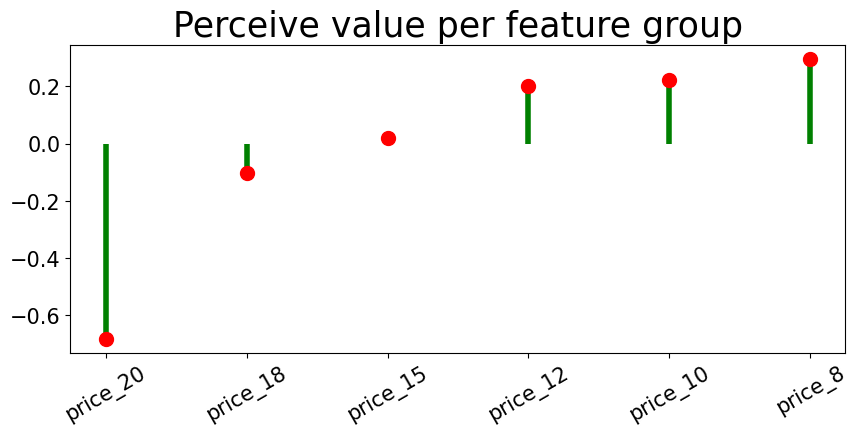

In [15]:
# Lollipop chart
f, ax = plt.subplots(figsize = (10,4))
plt.title('Perceive value per feature group', fontsize = 25)

# Lollipop plot
(markers, stemlines, baseline) = plt.stem(attribute , coefficents , linefmt = "-" , markerfmt = "o", basefmt = " " )

# customize lollipop
plt.setp(stemlines, color = "green" , linewidth = 4)
plt.setp( markers, color = "red" , markersize = 10)
# customize ticks
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15 , rotation = 30)
plt.show


### Feature importance

In [16]:
from posixpath import split
# coefficients
features_parworth = {}
for keys, coeff in model.params.items():
  split_keys = keys.split('_')
  feature = split_keys[0]
  if feature not in features_parworth:
    features_parworth[feature] = list()
  features_parworth[feature].append(coeff)
features_parworth

{'NumberAccounts': [-0.70355777032009,
  -0.07196379758701686,
  -0.021968902691950152,
  0.1251675875494216,
  0.13161143652183438,
  0.4955668938608648],
 'price': [0.29644978631707464,
  0.22023371151399002,
  0.20138336697081743,
  0.019742122377615943,
  -0.1026075648136737,
  -0.6803459750327627],
 'ExtraContent': [0.22741739060922767,
  0.2266389052450029,
  0.14512430909970503,
  0.12678697622002036,
  -0.2046486557911228,
  -0.5664634780497695],
 'ads': [0.2075052292439899, 0.10883922020441415, -0.3614890021153414]}

In [17]:
# Calculations of the max feature (price_8) - the mini feature (price_20)
importance_per_feature = {k: max(v) - min(v) for k , v in features_parworth.items()}
importance_per_feature

{'NumberAccounts': 1.1991246641809548,
 'price': 0.9767957613498374,
 'ExtraContent': 0.7938808686589971,
 'ads': 0.5689942313593312}

In [18]:
# Computing the sum of the importances
total_importance = sum(importance_per_feature.values())
total_importance

3.5387955255491206

In [19]:
# Relative importance (adds up to 100)
relative_importance = {
    k: round( 100* v/ total_importance,1) for k, v in importance_per_feature.items()
}
relative_importance


{'NumberAccounts': 33.9, 'price': 27.6, 'ExtraContent': 22.4, 'ads': 16.1}

In [20]:
# Build DF
df_importance = pd.DataFrame(list(relative_importance.items()),
                             columns = ['feature','relative_importance'])
df_importance

,feature,relative_importance
0,NumberAccounts,33.9
1,price,27.6
2,ExtraContent,22.4
3,ads,16.1


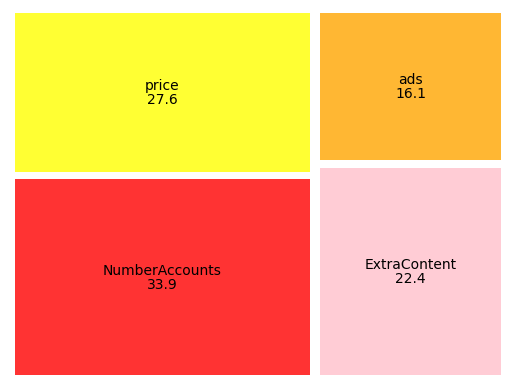

In [21]:
# Tree Map
squarify.plot(sizes = df_importance.relative_importance, label = df_importance.feature, color = ["red" , "yellow" , "pink" , "orange"] , value = df_importance.relative_importance , alpha = 0.8 , pad = 1)
plt.axis('off')
plt.show()


### Interaction terms

In [22]:
# interaction terms
df['content_ads'] = df.ExtraContent + "_ "+ df.ads
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_ one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_ one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_ one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_ one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_ one_per_show


In [23]:
# Remove variables in the interaction term
df_interaction = df.drop(columns = ['ExtraContent' , 'ads'])
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_ one_per_day
1,7,6,8,1,Marvel_ one_per_show
2,7,4,15,1,Disney_ one_per_day
3,7,5,10,1,HBO_ one_per_day
4,7,1,20,1,Soccer_ one_per_show


In [24]:
# Islolate for x , y
y = df_interaction.selected
X = df_interaction.drop(columns = ['selected' , 'customerid'])
X.head(2)

,NumberAccounts,price,content_ads
0,2,10,HBO_ one_per_day
1,6,8,Marvel_ one_per_show


In [25]:
# Create dummy variables
x_dummy = pd.get_dummies(X , columns = X.columns)
x_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_ one_per_show,content_ads_Prime originals_ none,content_ads_Prime originals_ one_per_day,content_ads_Prime originals_ one_per_show,content_ads_Soccer_ none,content_ads_Soccer_ one_per_day,content_ads_Soccer_ one_per_show,content_ads_less content_ none,content_ads_less content_ one_per_day,content_ads_less content_ one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [26]:
# Build regression model
model2 = sm.GLM(y,
               x_dummy,
               family = sm.families.Binomial()).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Mon, 06 Jan 2025   Deviance:                       3896.6
Time:                        09:11:47   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7036      0.090     -7.813      0.000      -0.880      -0.527
NumberAccounts_2                -0.0720      0.089     -0.812      0.417      -0.246       0.102
NumberAccounts_3                -0.0220      0.088     -0.250      0.802      -0.194       0.150
NumberAccounts_4                 0.1252      0.083      1.500      0.134      -0.038       0.289
NumberAccounts_5                 0.1316      0.085      1.557      0.120      -0.034       0.297
NumberAccounts_6                 0.4956      0.082      6.042      0.000       0.335       0.656
price_8                          0.2964      0.085      3.491      0.000       0.130       0.463
price_10                         0.2202      0.087      2.529      0.011       0.050       0.391
price_12                         0.2014      0.082      2.449      0.014       0.040       0.363
price_15                         0.0197      0.084      0.235      0.815      -0.145       0.185
price_18                        -0.1026      0.087     -1.178      0.239      -0.273       0.068
price_20                        -0.6803      0.091     -7.515      0.000      -0.858      -0.503
ExtraContent_Disney              0.2274      0.087      2.608      0.009       0.057       0.398
ExtraContent_HBO                 0.2266      0.085      2.670      0.008       0.060       0.393
ExtraContent_Marvel              0.1451      0.084      1.728      0.084      -0.020       0.310
ExtraContent_Prime originals     0.1268      0.086      1.472      0.141      -0.042       0.296
ExtraContent_Soccer             -0.2046      0.085     -2.408      0.016      -0.371      -0.038
ExtraContent_less content       -0.5665      0.088     -6.408      0.000      -0.740      -0.393
ads_none                         0.2075      0.055      3.747      0.000       0.099       0.316
ads_one_per_day                  0.1088      0.056      1.933      0.053      -0.002       0.219
ads_one_per_show                -0.3615      0.057     -6.328      0.000      -0.473      -0.250
================================================================================================
"""

### Interaction Term results

In [27]:
# Create df with the results
df_result_interaction = pd.DataFrame({'param_name': model2.params.index, 'partworth': model2.params.values, 'pval': model2.pvalues})
df_result_interaction.head()

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.717649,5.971619e-15
NumberAccounts_2,NumberAccounts_2,-0.070614,4.324046e-01
NumberAccounts_3,NumberAccounts_3,-0.033510,7.072326e-01
NumberAccounts_4,NumberAccounts_4,0.111998,1.855720e-01
NumberAccounts_5,NumberAccounts_5,0.121629,1.564555e-01


In [33]:
# Isolate group features
feature = "content_ads"
attribute = []
coefficents = []
for i in range(len(df_result_interaction)):
  if df_result_interaction.iloc[i,0].find(feature) == 0:
     if df_result_interaction.iloc[i,0].find("none") == -1:
      attribute.append(df_result_interaction.iloc[i,0])
      coefficents.append(df_result_interaction.iloc[i,1])

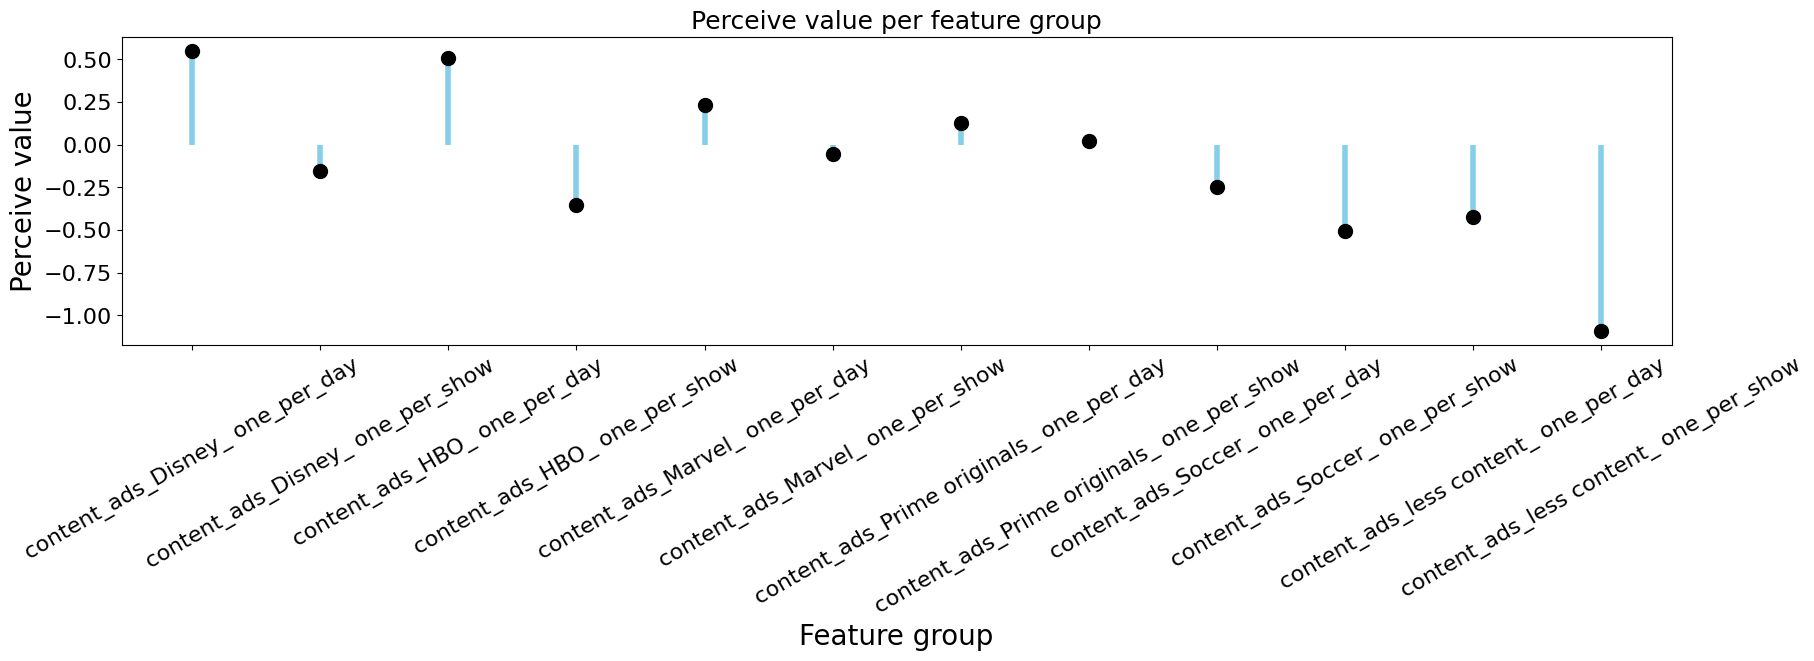

In [35]:
# Plot lolipop chart
# Plot parworths chart
f, ax = plt.subplots(figsize = (20,4))
plt.title('Perceive value per feature group', fontsize = 18)
plt.xlabel('Feature group', fontsize = 20)
plt.ylabel('Perceive value', fontsize = 20)

# lolipop chart
(markers, stemlines, baseline) = plt.stem(attribute , coefficents , linefmt = "-" , markerfmt = "o", basefmt = " " )
plt.setp(stemlines,
         color = "skyblue",
         linewidth = 4)
plt.setp(markers,
         color = "black",
         markersize = 10)

# Customizing the ticks
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16,
           rotation = 30)

#Plot
plt.show()